# INTENSAVY TASK-1

We are Predicting Changes of Admissions for Graduate Indian Students to Foreign University.

**Abstract**: Prospective graduate students always face a dilemma deciding universities of their choice while applying to master's programs. While there are a good number of predictors and consultancies that guide a student, they aren't always reliable since decision is made on the basis of select past admissions. In this paper, we present a Machine Learning based method where we compare different regression algorithms, such as Linear Regression, Support Vector Regression, Decision Trees and Random Forest, given the profile of the student. We then compute error functions for the different models and compare their performance to select the best performing model. Results then indicate if the university of choice is an ambitious or a safe one.

The Dataset's parameters included are :

- **GRE Scores (out of 340)**: This refers to the scores obtained by a student in the Graduate Record Examination (GRE), which is a standardized test commonly used for admission into graduate programs. The scores range from 0 to 340, with higher scores indicating better performance.

- **TOEFL Scores (out of 120)**: This refers to the scores obtained by a student in the Test of English as a Foreign Language (TOEFL), which measures English language proficiency for non-native English speakers. The scores range from 0 to 120, with higher scores indicating better English language skills.

- **University Rating (out of 5)**: This represents the rating or reputation of the university or institution from which the student graduated or is applying to. It is usually based on various factors such as research output, faculty quality, infrastructure, and academic performance. The rating ranges from 1 to 5, with higher values indicating higher ratings or better universities.

- **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: This refers to the perceived strength or quality of the student's statement of purpose and letter of recommendation. It is usually assessed by the admissions committee or reviewers based on the content, clarity, coherence, and strength of recommendations. The scores range from 1 to 5, with higher values indicating stronger statements and recommendations.
- **Undergraduate GPA (out of 10)**: This represents the Grade Point Average (GPA) achieved by the student during their undergraduate studies. The GPA is a numerical representation of a student's academic performance, typically ranging from 0 to 10. Higher values indicate higher GPAs, reflecting better academic achievement.

- **Research Experience (either 0 or 1)**: This indicates whether the student has prior research experience or not. It is represented as a binary variable, where 0 typically means no research experience and 1 means the student has research experience.

- **Chance of Admit (ranging from 0 to 1)**:  chance of admit is a parameter that was asked to individuals (some values manually entered) before the results of the application. Think of it this way, with all the scores and other documents you have, you are interested in feeding the data to a ML model and see what it predicts. Basically, you are allowing it to make a prediction regarding your chance of admit so that you can understand what your own chances are. I do understand that eventually it is entirely your decision whether you choose to apply to a particular university or not, however this dataset was only created to be fed into different ML models and check how well it can understand the importance of different parameters before making a prediction.

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for data analysis, modeling, and evaluation.
from tabulate import tabulate  #function can be used to convert data, such as lists or pandas DataFrames, into a formatted table

pd.set_option('display.max_columns',500) 

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("C:/Users/91932/Desktop/InternSavy/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = data.copy()
data.drop(['Serial No.'], axis=1, inplace=True)

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset into a pandas DataFrame (replace with your own data)
data = pd.read_csv("C:/Users/91932/Desktop/InternSavy/Admission_Predict_Ver1.1.csv")

# Generate the profiling report
profile = ProfileReport(data, title="Dataset Profiling Report")

# Save the report to an HTML file
profile.to_file("profiling_report.html")


C:\Users\91932\AppData\Local\Temp\ipykernel_21032\1998091488.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

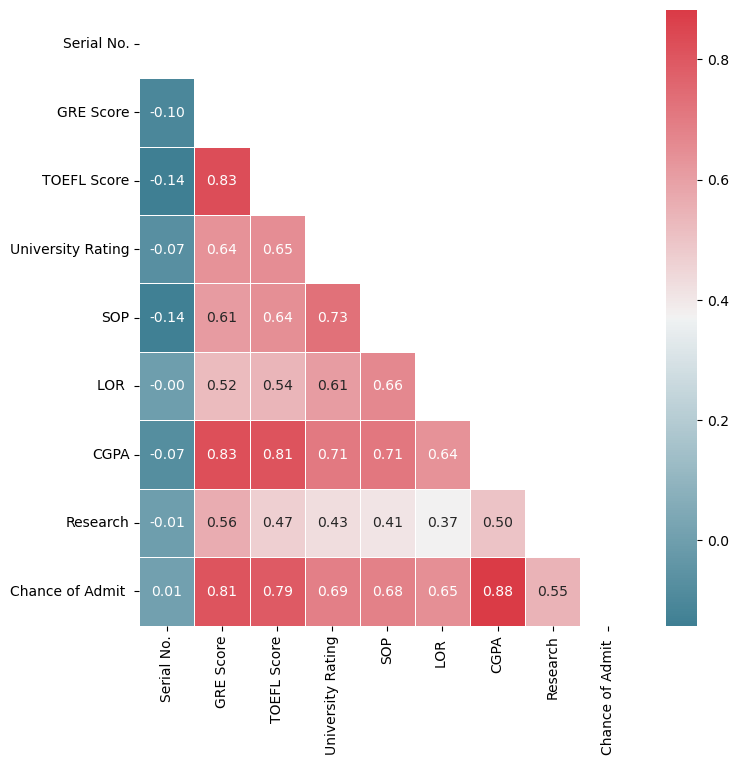

In [5]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [9]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 2.8 MB/s eta 0:00:00
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")

model_df = {}


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    model_df[name] = (np.sqrt(mean_squared_error(y_test, predictions)))

Results...
DecisionTree : 0.09098351499035415
Linear Regression : 0.057833975249042435
RandomForest : 0.051649998063891464
KNeighbours : 0.11716228061966018
SVM : 0.09186782300570517
AdaBoostClassifier : 0.05513066387603024
GradientBoostingClassifier:  0.0498059226439498
Xgboost:  0.06534140032738223
CatBoost:  0.04673173405601508
Lasso:  0.1148860969290504
Ridge:  0.05831519386729694
BayesianRidge:  0.059175262027732545
ElasticNet:  0.08897598984510355
HuberRegressor:  0.06890833033374175


C:\Users\91932\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [11]:
x = df.iloc[:, :-1].values # Independent Var x
y = df.iloc[:, -1].values  # Dependent Var y


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=False)
# If the "chance of admit" is greater than "80" then the admission is confirmed means "1"
y_train = [1 if each > 0.8 else 0 for each in y_train]
# If the "chance of admit" is lower than "80" then the admission is not confirmed means "0"
y_test = [1 if each > 0.8 else 0 for each in y_test]
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[[73  2]
 [ 3 22]]
Accuracy: 95.00%
MSE: 0.22360679774997896


In [12]:
p = pd.DataFrame(data=model_df.values(), columns=['models'], index=model_df.keys())
model_df
p.sort_values(by=['models'])

,models
CatBoost:,0.046732
GradientBoostingClassifier:,0.049806
RandomForest :,0.051650
AdaBoostClassifier :,0.055131
Linear Regression :,0.057834
Ridge:,0.058315
BayesianRidge:,0.059175
Xgboost:,0.065341
HuberRegressor:,0.068908
ElasticNet:,0.088976


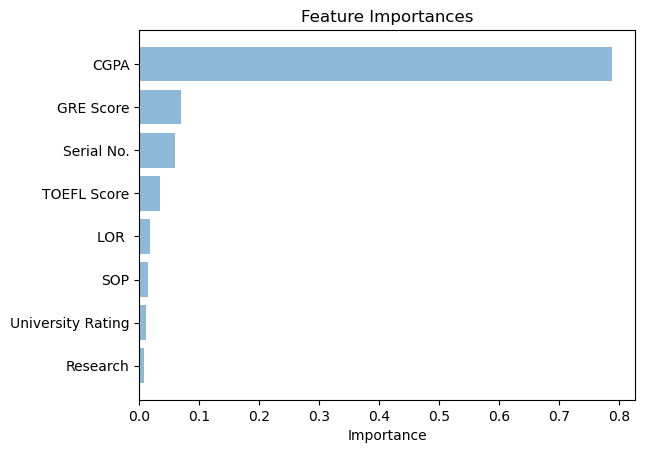

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh(range(len(importance_frame)), importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks(range(len(importance_frame)), importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


CGPA is the most important



add multicollinearity, hyper-parameters are tuned differently and a better tuned Random Forest may produce better metrics' results. I think, in tasks with small dimension, strong nonlinear models need initial tune-up for correct work. This can be reason that they are worse than regression.


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

target = data['Chance of Admit ']
mc_data = data.drop(['Chance of Admit '], axis=1)


vif = pd.DataFrame()
vif["variables"] = mc_data.columns
vif["VIF"] = [variance_inflation_factor(mc_data.values, i) for i in range(mc_data.shape[1])]

# Print the VIF values
print(vif)

# Remove features with high VIF
threshold = 5
while max(vif["VIF"]) > threshold:
    # Get the feature with the highest VIF
    max_vif_feature = vif.loc[vif["VIF"].idxmax(), "variables"]
    # Remove the feature from the dataset and VIF table
    mc_data = mc_data.drop(columns=[max_vif_feature])
    vif = vif.drop(vif[vif["variables"] == max_vif_feature].index)
    # Recalculate VIF values
    vif["VIF"] = [variance_inflation_factor(mc_data.values, i) for i in range(mc_data.shape[1])]

# Print the remaining features
print(mc_data.columns)

# This code can remove the multicollinearity from your data before using this you need to split the data into independent data and target so that it doesnt remove the target

           variables          VIF
0         Serial No.     4.159745
1          GRE Score  1328.233222
2        TOEFL Score  1230.783122
3  University Rating    20.934147
4                SOP    36.155544
5               LOR     31.231834
6               CGPA   952.907558
7           Research     2.869689
Index(['Serial No.', 'University Rating', 'Research'], dtype='object')


In [18]:
X = mc_data
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, min_samples_leaf=1)],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")

model_df = {}


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    model_df[name] = (np.sqrt(mean_squared_error(y_test, predictions)))

Results...
DecisionTree : 0.15350570021989413
Linear Regression : 0.1251591467350938
RandomForest : 0.13394351211785369
KNeighbours : 0.16692213753723625
SVM : 0.17840542466975956
AdaBoostClassifier : 0.11063724360222348
GradientBoostingClassifier:  0.14527945095913597
Xgboost:  0.15622712419743878
CatBoost:  0.13284271944469916
Lasso:  0.13524648793961344
Ridge:  0.12510444579885946
BayesianRidge:  0.12505321809729303
ElasticNet:  0.13557677050180642
HuberRegressor:  0.12368003101055228


In [20]:
p['models without multicollinearity'] = model_df.values()
p.sort_values(by=['models without multicollinearity'])

,models,models without multicollinearity
AdaBoostClassifier :,0.055131,0.110637
HuberRegressor:,0.068908,0.123680
BayesianRidge:,0.059175,0.125053
Ridge:,0.058315,0.125104
Linear Regression :,0.057834,0.125159
CatBoost:,0.046732,0.132843
RandomForest :,0.051650,0.133944
Lasso:,0.114886,0.135246
ElasticNet:,0.088976,0.135577
GradientBoostingClassifier:,0.049806,0.145279


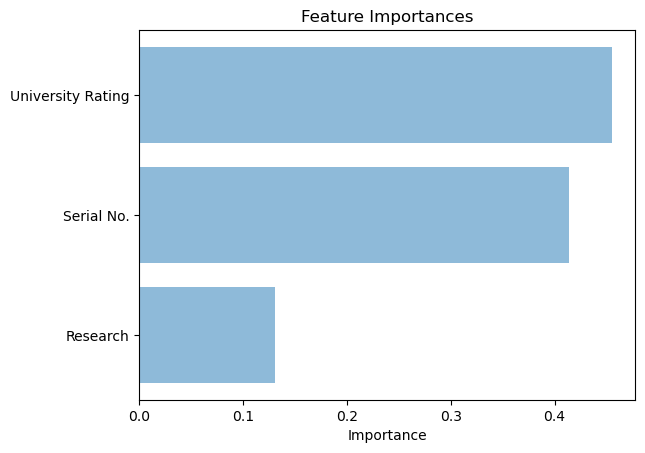

In [22]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh(range(len(importance_frame)), importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks(range(len(importance_frame)), importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
